# Beautiful Soup - Quick examples to get data from the web using python

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Beautiful-Soup---Quick-examples-to-get-data-from-the-web-using-python" data-toc-modified-id="Beautiful-Soup---Quick-examples-to-get-data-from-the-web-using-python-1">Beautiful Soup - Quick examples to get data from the web using python</a></span><ul class="toc-item"><li><span><a href="#Installing-beautifulsoup-library" data-toc-modified-id="Installing-beautifulsoup-library-1.1">Installing beautifulsoup library</a></span></li><li><span><a href="#Accessing-your-first-webpage" data-toc-modified-id="Accessing-your-first-webpage-1.2">Accessing your first webpage</a></span><ul class="toc-item"><li><span><a href="#Displaying-the-content-of-the-page-in-html-format" data-toc-modified-id="Displaying-the-content-of-the-page-in-html-format-1.2.1">Displaying the content of the page in html format</a></span></li></ul></li><li><span><a href="#Extracting-a-single-piece-of-information.-Accessing-current-weather-data" data-toc-modified-id="Extracting-a-single-piece-of-information.-Accessing-current-weather-data-1.3">Extracting a single piece of information. Accessing current weather data</a></span></li><li><span><a href="#Accessing-multiple-pieces-of-information" data-toc-modified-id="Accessing-multiple-pieces-of-information-1.4">Accessing multiple pieces of information</a></span></li><li><span><a href="#Wrapping-all-in-a-pandas-dataframe-and-displaying-using-matplotlib" data-toc-modified-id="Wrapping-all-in-a-pandas-dataframe-and-displaying-using-matplotlib-1.5">Wrapping all in a pandas dataframe and displaying using matplotlib</a></span></li></ul></li></ul></div>

## Installing beautifulsoup library

To install the package on your jupyter notebook just type the following line in a markdown cell

In [ ]:
!pip install beautifulsoup4

## Accessing your first webpage

In [4]:
import requests
page= requests.get('https://www.weather.gov/')
page

<Response [200]>

### Displaying the content of the page in html format

In [5]:
page.content

b'\t\n    <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n    <head>\n        <link rel="schema.DC" href="http://purl.org/dc/elements/1.1/" /><title>National Weather Service</title><meta name="DC.title" content="National Weather Service" /><meta name="DC.description" content="NOAA National Weather Service National Weather Service" /><meta name="DC.creator" content="US Department of Commerce, NOAA, National Weather Service" /><meta name="DC.date.created" scheme="ISO8601" content="" /><meta name="DC.language" scheme="DCTERMS.RFC1766" content="EN-US" /><meta name="DC.keywords" content="weather, National Weather Service" /><meta name="DC.publisher" content="NOAA\'s National Weather Service" /><meta name="DC.contributor" content="National Weather Service" /><meta name="DC.rights" content="http://www.weather.gov/disclaimer.php" /><meta name="rating" content="General" /><met

The problem with this command is that the html code is displayed with no order. That is why we now introduce BeautifulSoup. 

In [7]:
from bs4 import BeautifulSoup
soup  = BeautifulSoup(page.content, 'html.parser')

In [8]:
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/>
  <title>
   National Weather Service
  </title>
  <meta content="National Weather Service" name="DC.title"/>
  <meta content="NOAA National Weather Service National Weather Service" name="DC.description"/>
  <meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/>
  <meta content="" name="DC.date.created" scheme="ISO8601"/>
  <meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/>
  <meta content="weather, National Weather Service" name="DC.keywords"/>
  <meta content="NOAA's National Weather Service" name="DC.publisher"/>
  <meta content="National Weather Service" name="DC.contributor"/>
  <meta content="http://www.weather.gov/disclaimer.php" name="DC.rights"/>
  <meta content="General" name="rating"

Let's check all the links  in the page we are scraping:

In [33]:
soup.select('a')

[<a class="header-nws" href="http://www.weather.gov"><img alt="National Weather Service" src="/css/images/header.png"/></a>,
 <a class="header-doc" href="http://www.commerce.gov"><img alt="United States Department of Commerce" src="/css/images/header_doc.png"/></a>,
 <a class="header-noaa" href="http://www.noaa.gov" title="National Oceanic and Atmospheric Administration"></a>,
 <a href="#" onclick="goBack();">HOME</a>,
 <a href="http://www.weather.gov/forecastmaps">FORECAST</a>,
 <a href="http://www.weather.gov">Local</a>,
 <a href="http://digital.weather.gov">Graphical</a>,
 <a href="http://www.aviationweather.gov/">Aviation</a>,
 <a href="http://www.nws.noaa.gov/om/marine/home.htm">Marine</a>,
 <a href="http://water.weather.gov/ahps/">Rivers and Lakes</a>,
 <a href="http://www.nhc.noaa.gov/">Hurricanes</a>,
 <a href="http://www.spc.noaa.gov/">Severe Weather</a>,
 <a href="http://www.weather.gov/fire/">Fire Weather</a>,
 <a href="http://aa.usno.navy.mil/data/docs/RS_OneDay.php">Sun/Mo

## Extracting a single piece of information. Accessing current weather data

In [38]:
page  = requests.get("https://forecast.weather.gov/MapClick.php?lat=25.767750000000035&lon=-80.36114499999996#.XhNx8lVKjRY")
soup = BeautifulSoup(page.content, 'html.parser')
seven_days = soup.find(id="seven-day-forecast-body")
print(seven_days.prettify())

<div class="panel-body" id="seven-day-forecast-body">
 <div id="seven-day-forecast-container">
  <ul class="list-unstyled" id="seven-day-forecast-list">
   <li class="forecast-tombstone">
    <div class="tombstone-container">
     <p class="period-name">
      This
      <br/>
      Afternoon
     </p>
     <p>
      <img alt="This Afternoon: Mostly sunny, with a high near 73. Northeast wind around 9 mph. " class="forecast-icon" src="newimages/medium/sct.png" title="This Afternoon: Mostly sunny, with a high near 73. Northeast wind around 9 mph. "/>
     </p>
     <p class="short-desc">
      Mostly Sunny
     </p>
     <p class="temp temp-high">
      High: 73 °F
     </p>
    </div>
   </li>
   <li class="forecast-tombstone">
    <div class="tombstone-container">
     <p class="period-name">
      Tonight
      <br/>
      <br/>
     </p>
     <p>
      <img alt="Tonight: Partly cloudy, with a low around 57. Northeast wind 5 to 7 mph becoming calm  in the evening. " class="forecast-ic

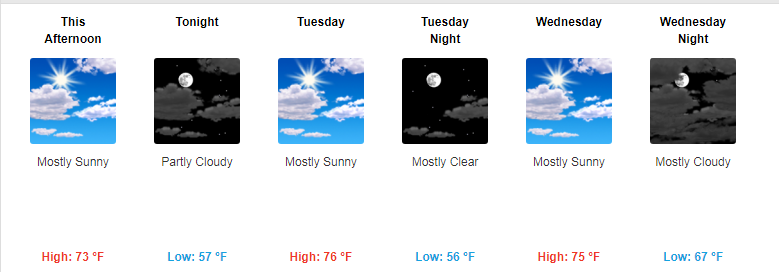

In [41]:
forecast_items = seven_days.find_all(class_='tombstone-container')
print(forecast_items[0].prettify())

<div class="tombstone-container">
 <p class="period-name">
  This
  <br/>
  Afternoon
 </p>
 <p>
  <img alt="This Afternoon: Mostly sunny, with a high near 73. Northeast wind around 9 mph. " class="forecast-icon" src="newimages/medium/sct.png" title="This Afternoon: Mostly sunny, with a high near 73. Northeast wind around 9 mph. "/>
 </p>
 <p class="short-desc">
  Mostly Sunny
 </p>
 <p class="temp temp-high">
  High: 73 °F
 </p>
</div>


Up to this point we have all the information related to the weather of the place we just searched --this case Miami-- but it is not readeable for an user not used to html code. It needs some changes

In [44]:
period = forecast_items[0].find(class_ = "period-name").get_text()  #getting the forecast time
description = forecast_items[0].find(class_ = "short-desc").get_text() #getting the short description
temp = forecast_items[0].find(class_ = "temp").get_text() #getting the temp

In [45]:
print(period)
print(description)
print(temp)

ThisAfternoon
Mostly Sunny
High: 73 °F


## Accessing multiple pieces of information

In [47]:
period_tags = seven_days.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['ThisAfternoon',
 'Tonight',
 'Tuesday',
 'TuesdayNight',
 'Wednesday',
 'WednesdayNight',
 'Thursday',
 'ThursdayNight',
 'Friday']

In [52]:
short_descs = [sd.get_text() for sd in seven_days.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_days.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_days.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['Mostly Sunny', 'Partly Cloudy', 'Mostly Sunny', 'Mostly Clear', 'Mostly Sunny', 'Mostly Cloudy', 'Slight ChanceShowers andBreezy', 'Slight ChanceShowers', 'Breezy.Partly Sunnythen SlightChanceShowers']
['High: 73 °F', 'Low: 57 °F', 'High: 76 °F', 'Low: 56 °F', 'High: 75 °F', 'Low: 67 °F', 'High: 77 °F', 'Low: 71 °F', 'High: 80 °F']
['This Afternoon: Mostly sunny, with a high near 73. Northeast wind around 9 mph. ', 'Tonight: Partly cloudy, with a low around 57. Northeast wind 5 to 7 mph becoming calm  in the evening. ', 'Tuesday: Mostly sunny, with a high near 76. Calm wind becoming northwest around 6 mph in the morning. ', 'Tuesday Night: Mostly clear, with a low around 56. Calm wind becoming north around 5 mph after midnight. ', 'Wednesday: Mostly sunny, with a high near 75. Northeast wind 5 to 11 mph. ', 'Wednesday Night: Mostly cloudy, with a low around 67. Northeast wind around 11 mph. ', 'Thursday: A 20 percent chance of showers.  Partly sunny, with a high near 77. Breezy, with

## Wrapping all in a pandas dataframe and displaying using matplotlib

Since we already have different lists containing the information related to each forecast periods, the description and temperatures, then we can just add it to a DataFrame using pandas

In [62]:
import pandas as pd 

data = pd.DataFrame({
    'Time':periods,
    'Description':short_descs,
    'Temperature':temps
})

If you need the numeric temperature for future analyses then you could do the following:

In [85]:
data['N_temp'] = data.Temperature.apply(lambda x: float(x.split()[1]))
data['HL'] = data.Temperature.apply(lambda x: x.split()[0][:-1])
data

,Time,Description,Temperature,N_temp,HL
0,ThisAfternoon,Mostly Sunny,High: 73 °F,73.0,High
1,Tonight,Partly Cloudy,Low: 57 °F,57.0,Low
2,Tuesday,Mostly Sunny,High: 76 °F,76.0,High
3,TuesdayNight,Mostly Clear,Low: 56 °F,56.0,Low
4,Wednesday,Mostly Sunny,High: 75 °F,75.0,High
5,WednesdayNight,Mostly Cloudy,Low: 67 °F,67.0,Low
6,Thursday,Slight ChanceShowers andBreezy,High: 77 °F,77.0,High
7,ThursdayNight,Slight ChanceShowers,Low: 71 °F,71.0,Low
8,Friday,Breezy.Partly Sunnythen SlightChanceShowers,High: 80 °F,80.0,High


In [90]:
low_temp = data.loc[data['HL']=='Low','N_temp']
low_temp

1    57.0
3    56.0
5    67.0
7    71.0
Name: N_temp, dtype: float64

In [91]:
high_temp = data.loc[data['HL']=='High','N_temp']
high_temp

0    73.0
2    76.0
4    75.0
6    77.0
8    80.0
Name: N_temp, dtype: float64

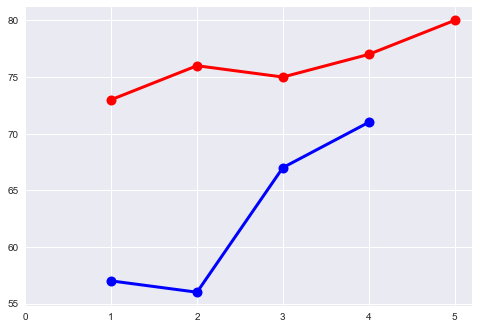

In [114]:
import matplotlib.pyplot as plt 

plt.style.use('seaborn')
plt.plot(range(1, len(high_temp)+1),list(high_temp), color = 'red', linewidth = 3, marker = 'o', markersize = 10)
plt.plot(range(1,len(low_temp)+1),list(low_temp), color = 'blue', linewidth = 3, marker = 'o', markersize = 10)

plt.xticks(range(len(high_temp)+1))
plt.show()